Some scripts to analyze the csv-files produced by the testing function

In [86]:
import pandas as pd
import numpy as np
import torch

In [42]:
# Just as a test:
dfConfusion = pd.read_csv("../../ots_prelim/swin_b/swin_b_adam_batch256_imnetnorm_confusiona.csv")
dfPredictions = pd.read_csv("../../ots_prelim/swin_b/swin_b_adam_batch256_imnetnorm_predictionsa.csv")

In [43]:
print(dfConfusion.columns[1:].to_list())

['faience', 'porselein', 'papier', 'zilver', 'hout', 'brons', 'glas (materiaal)', 'perkament', 'geprepareerd papier', 'fotopapier', 'ijzer', 'Japans papier', 'ivoor', 'Oosters papier', 'eikenhout', 'terracotta', 'aardewerk', 'zijde', 'koper', 'messing', 'goud', 'klei', 'tin', 'karton', 'steengoed', 'satijn', 'kardoespapier', 'palmhout', 'paneel', 'lood (materiaal)']


In [9]:
def getNumpyConfusionMatrix(df: pd.DataFrame) -> np.ndarray:
    materials = df.columns[1:].to_list()
    return df[materials].to_numpy()

<class 'numpy.ndarray'>


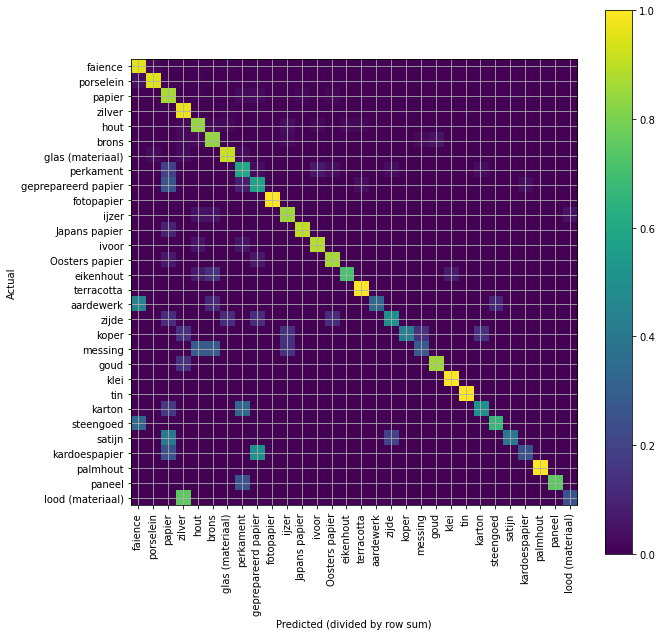

In [68]:
import matplotlib.pyplot as plt
cm = getNumpyConfusionMatrix(dfConfusion)
cm = cm / np.sum(cm, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(cm.T)
plt.yticks(ticks=[x for x in range(30)], labels=dfConfusion.columns.to_list()[1:])
plt.xticks(ticks=[x for x in range(30)], labels=dfConfusion.columns.to_list()[1:], rotation="vertical")
plt.ylabel("Actual")
plt.xlabel("Predicted (divided by row sum)")
plt.grid()
plt.colorbar()
plt.show()

In [67]:
# True positives, True Negatives, etc
def extractRates(df: pd.DataFrame):
    cm = getNumpyConfusionMatrix(df).T
    TP = cm.diagonal()
    FP = cm.sum(axis=0) - TP
    FN = cm.sum(axis=1) - TP
    TN = cm.sum() - TP - FP - FN
    return {
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN
    }

In [79]:
def perClassMetrics(df: pd.DataFrame) -> pd.DataFrame:
    materials = df.columns.to_list()[1:]
    rates = extractRates(df)
    recall = rates["TP"] / (rates["TP"] + rates["FN"])
    precision = rates["TP"] / (rates["TP"] + rates["FP"])
    specificity = rates["TN"] / (rates["TN"] + rates["FP"])

    return pd.DataFrame.from_dict({
        "materials": materials,
        "recall [TP/(TP+FN)]": recall,
        "precision [TP/(TP+FP)]": precision,
        "TP": rates["TP"],
        "FP": rates["FP"],
        "FN": rates["FN"],
        "TN": rates["TN"]
    })

perClassMetrics(dfConfusion)

,materials,recall [TP/(TP+FN)],precision [TP/(TP+FP)],TP,FP,FN,TN
0,faience,0.960000,0.905660,96,10,4,677
1,porselein,0.950000,0.969388,95,3,5,684
2,papier,0.870000,0.805556,87,21,13,666
3,zilver,0.970000,0.923810,97,8,3,679
4,hout,0.843137,0.826923,43,9,8,727
5,brons,0.842105,0.820513,32,7,6,742
6,glas (materiaal),0.914286,0.888889,32,4,3,748
7,perkament,0.600000,0.642857,18,10,12,747
8,geprepareerd papier,0.576923,0.652174,15,8,11,753
9,fotopapier,1.000000,1.000000,24,0,0,763


In [92]:
dfPredictions

,faience,porselein,papier,zilver,hout,brons,glas (materiaal),perkament,geprepareerd papier,fotopapier,...,karton,steengoed,satijn,kardoespapier,palmhout,paneel,lood (materiaal),actual_idx,actual,batch_loss
0,0.000254,0.999650,0.000008,0.000018,3.660543e-07,2.062675e-06,0.000031,4.179776e-06,3.770744e-06,7.996032e-07,...,8.717414e-07,4.062542e-07,3.643064e-07,8.591201e-08,1.390214e-07,3.906825e-08,2.762857e-07,1,porselein,2.673611
1,0.000050,0.000113,0.000032,0.000024,5.999564e-05,9.981263e-01,0.000031,3.077108e-08,1.485258e-06,1.210189e-07,...,2.638711e-08,1.016049e-06,1.947651e-07,1.771515e-07,1.894597e-06,2.621239e-08,1.489540e-03,5,brons,2.673611
2,0.024749,0.971973,0.000011,0.000008,3.202702e-06,1.480147e-06,0.000050,8.828475e-06,4.815098e-06,3.155494e-06,...,9.893785e-07,9.904660e-07,6.172331e-07,1.716453e-07,3.297103e-07,2.510559e-08,1.050780e-07,1,porselein,2.673611
3,0.952146,0.012575,0.000029,0.000010,9.167986e-06,1.483577e-04,0.000190,1.872237e-05,2.067233e-06,5.483431e-06,...,1.265771e-06,1.423159e-03,2.623600e-06,1.337976e-06,2.177999e-06,3.837791e-07,1.465700e-06,24,steengoed,2.673611
4,0.569751,0.413060,0.000009,0.000004,6.548188e-06,1.972788e-07,0.000011,3.529388e-06,1.779828e-06,7.194189e-07,...,2.296598e-07,4.251903e-06,4.629404e-07,8.925448e-08,3.996646e-07,1.062773e-08,8.184049e-08,0,faience,2.673611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.000276,0.002742,0.002458,0.010844,1.155874e-02,4.032003e-02,0.000606,1.013834e-03,1.108471e-03,1.808258e-03,...,1.486374e-03,1.287381e-03,1.239992e-04,2.700025e-04,2.177817e-03,9.276610e-04,2.441902e-04,20,goud,2.705249
783,0.004188,0.995662,0.000002,0.000008,6.586408e-07,3.874376e-07,0.000039,1.323076e-06,6.661568e-07,9.341455e-07,...,3.277837e-07,8.520723e-07,1.961402e-07,3.220871e-08,4.071289e-07,1.317212e-08,5.001979e-08,1,porselein,2.705249
784,0.001954,0.001536,0.002574,0.274956,3.229818e-02,1.086403e-01,0.044622,6.142230e-04,1.259634e-04,1.404439e-04,...,2.268155e-04,6.867028e-03,7.537174e-05,9.580746e-05,2.079423e-04,1.915113e-05,3.743052e-02,3,zilver,2.705249
785,0.069166,0.912620,0.000121,0.000126,1.993679e-05,3.088161e-04,0.001423,8.629460e-05,2.695292e-05,7.053282e-05,...,8.164354e-06,6.514212e-04,1.301654e-05,6.793443e-06,3.345376e-06,5.892982e-06,1.943513e-05,1,porselein,2.705249


In [107]:
def getTestMetrics(dfConf: pd.DataFrame, dfPred: pd.DataFrame):
    dfPc = perClassMetrics(dfConf)
    accuracy = np.sum(dfPc["TP"]) / np.sum(dfPc["TP"] + dfPc["FP"])
    balanced_accuracy = np.sum(dfPc["recall [TP/(TP+FN)]"]) / len(dfPc)
    
    predictions = torch.from_numpy(dfPredictions[dfConf.columns[1:]].to_numpy())
    actual = torch.from_numpy(dfPred["actual_idx"].to_numpy())
    top2 = torch.topk(predictions, 2)
    top3 = torch.topk(predictions, 3)
    top5 = torch.topk(predictions, 5)
    acc2 = 0
    acc3 = 0
    acc5 = 0
    for pred2, pred3, pred5, act in zip(top2[1], top3[1], top5[1], actual):
        acc2 += (act in pred2)
        acc3 += (act in pred3)
        acc5 += (act in pred5)
    acc2 /= len(actual)
    acc3 /= len(actual)
    acc5 /= len(actual)

    return {
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy,
        "top-2_accuracy": acc2,
        "top-3_accuracy": acc3,
        "top-5_accuracy": acc5
    }

getTestMetrics(dfConfusion, dfPredictions)

{'accuracy': 0.8564167725540025,
 'balanced_accuracy': 0.7326541970814416,
 'top-2_accuracy': 0.9415501905972046,
 'top-3_accuracy': 0.9669631512071156,
 'top-5_accuracy': 0.98856416772554}